In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

### Cargar base de datos: 01_desastres_crudo_renamedcols.csv

In [2]:
df = pd.read_csv('../../Data/03Limpio/03desastreslimpio.csv')
df.head(10)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4,8,1902,4,8,1000,0,0
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10,24,1902,10,24,6000,0,0
5,1903-0006-CAN,1903,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1903,4,29,1903,4,29,76,23,0
6,1903-0012-COM,1903,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,...,NaN,1903,0,0,1903,0,0,17,0,0
7,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
8,1905-0005-CAN,1905,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1905,8,13,1905,8,13,18,18,0
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             16636 non-null  object
 1   Year               16636 non-null  int64 
 2   Seq                16636 non-null  int64 
 3   Disaster Subgroup  16636 non-null  object
 4   Disaster Type      16636 non-null  object
 5   Disaster Subtype   13313 non-null  object
 6   Country            16636 non-null  object
 7   ISO                16636 non-null  object
 8   Region             16636 non-null  object
 9   Continent          16636 non-null  object
 10  Location           14825 non-null  object
 11  Origin             4085 non-null   object
 12  Associated Dis     3593 non-null   object
 13  Dis Mag Value      16636 non-null  int64 
 14  Dis Mag Scale      15416 non-null  object
 15  Latitude           2775 non-null   object
 16  Longitude          2775 non-null   objec

In [4]:
df.isnull().sum()

Dis No                   0
Year                     0
Seq                      0
Disaster Subgroup        0
Disaster Type            0
Disaster Subtype      3323
Country                  0
ISO                      0
Region                   0
Continent                0
Location              1811
Origin               12551
Associated Dis       13043
Dis Mag Value            0
Dis Mag Scale         1220
Latitude             13861
Longitude            13861
Start Year               0
Start Month              0
Start Day                0
End Year                 0
End Month                0
End Day                  0
Total Deaths             0
Total Affected           0
Total Damages Adj        0
dtype: int64

## FILTRO

In [5]:
filter = df['Disaster Type'] == 'Earthquake'
df_earthquake = df[filter]

In [6]:
df_earthquake.head(2)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [7]:
df_earthquake.shape

(1597, 26)

In [8]:
df_earthquake.select_dtypes(include=np.number).columns.to_list()

['Year',
 'Seq',
 'Dis Mag Value',
 'Start Year',
 'Start Month',
 'Start Day',
 'End Year',
 'End Month',
 'End Day',
 'Total Deaths',
 'Total Affected',
 'Total Damages Adj']

## AFECTADOS POR TERREMOTOS

In [9]:
df_earthquake['Total Deaths'].sum()

2398560

In [10]:
df_earthquake['Total Affected'].sum()

221459077

In [11]:
df_earthquake['Total Affected'].sum()

221459077

## Nulos

In [12]:
df_earthquake.isnull().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
Country                 0
ISO                     0
Region                  0
Continent               0
Location               40
Origin               1576
Associated Dis       1255
Dis Mag Value           0
Dis Mag Scale           0
Latitude               50
Longitude              50
Start Year              0
Start Month             0
Start Day               0
End Year                0
End Month               0
End Day                 0
Total Deaths            0
Total Affected          0
Total Damages Adj       0
dtype: int64

In [13]:
df_earthquake['Country'].value_counts()

China                         203
Indonesia                     145
Iran (Islamic Republic of)    137
Turkey                        114
Japan                          70
                             ... 
Turkmenistan                    1
Serbia Montenegro               1
Burundi                         1
Dominica                        1
Wallis and Futuna               1
Name: Country, Length: 125, dtype: int64

In [14]:
df_earthquake.groupby('Country')['Total Deaths'].sum().to_frame()


,Total Deaths
Country,
Afghanistan,12622
Albania,626
Algeria,6771
American Samoa,34
Argentina,10476
...,...
Venezuela (Bolivarian Republic of),423
Wallis and Futuna,5
Yemen,10


In [15]:
a = df_earthquake.groupby('Continent')['Total Deaths'].sum().to_frame()
a

,Total Deaths
Continent,
Africa,21585
Americas,443261
Asia,1659098
Europe,268126
Oceania,6490


In [16]:
a = df_earthquake.groupby('Country')['Total Deaths'].value_counts()
a

Country      Total Deaths
Afghanistan  0               4
             1               4
             5               3
             11              2
             50              2
                            ..
Yugoslavia   12              1
             15              1
             19              1
             121             1
             1070            1
Name: Total Deaths, Length: 963, dtype: int64

## Tratamiento de coordenadas


In [17]:
df_earthquake[['Latitude','Longitude']].isnull().sum()

Latitude     50
Longitude    50
dtype: int64

In [18]:
df_earthquake[['Latitude', 'Longitude', 'Country']].reset_index().head(50)

,index,Latitude,Longitude,Country
0,2,14,-91,Guatemala
1,9,32.04,76.16,India
2,10,33.05,71.4,Chile
3,11,1.51,-78.46,Colombia
4,15,38.5,69.9,China
5,21,44.05,6.14,France
6,28,9.8,-84,Costa Rica
7,29,36,4,Algeria
8,37,-3.924,101.82,Indonesia
9,42,28,104,China


In [19]:
import re

In [20]:
# Convertir 'Latitude' y 'Longitude' a string
df_earthquake['Latitude'] = df_earthquake['Latitude'].astype(str)
df_earthquake['Longitude'] = df_earthquake['Longitude'].astype(str)

# Limpiar las coordenadas latitude y longitude
df_earthquake['Latitude'] = df_earthquake['Latitude'].apply(lambda x: re.sub('[^\d.-]', '', x.split('.', 1)[0]) if isinstance(x, str) else x)
df_earthquake['Longitude'] = df_earthquake['Longitude'].apply(lambda x: re.sub('[^\d.-]', '', x.split('.', 1)[0]) if isinstance(x, str) else x)

# Eliminar puntos finales
df_earthquake['Latitude'] = df_earthquake['Latitude'].str.rstrip('.')
df_earthquake['Longitude'] = df_earthquake['Longitude'].str.rstrip('.')

# Cambiar strings vacíos a NaN
df_earthquake['Latitude'] = df_earthquake['Latitude'].replace('', np.nan)
df_earthquake['Longitude'] = df_earthquake['Longitude'].replace('', np.nan)

# Convertir coordenadas válidas a float
df_earthquake['Latitude'] = df_earthquake['Latitude'].astype(float)
df_earthquake['Longitude'] = df_earthquake['Longitude'].astype(float)

# Identificar valores anómalos a partir de los grados
anomalous_lat = df_earthquake['Latitude'].abs() > 90
anomalous_lon = df_earthquake['Longitude'].abs() > 180

# Configurar valores anómalos a NaN
df_earthquake.loc[anomalous_lat, 'Latitude'] = np.nan
df_earthquake.loc[anomalous_lon, 'Longitude'] = np.nan

C:\Users\blanc\AppData\Local\Temp\ipykernel_10900\453656539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earthquake['Latitude'] = df_earthquake['Latitude'].astype(str)
C:\Users\blanc\AppData\Local\Temp\ipykernel_10900\453656539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earthquake['Longitude'] = df_earthquake['Longitude'].astype(str)
C:\Users\blanc\AppData\Local\Temp\ipykernel_10900\453656539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [21]:
df_earthquake[['Latitude', 'Longitude', 'Country']].reset_index().head(50)

,index,Latitude,Longitude,Country
0,2,14.0,-91.0,Guatemala
1,9,32.0,76.0,India
2,10,33.0,71.0,Chile
3,11,1.0,-78.0,Colombia
4,15,38.0,69.0,China
5,21,44.0,6.0,France
6,28,9.0,-84.0,Costa Rica
7,29,36.0,4.0,Algeria
8,37,-3.0,101.0,Indonesia
9,42,28.0,104.0,China


In [22]:
df_earthquake[['Latitude', 'Longitude']].isnull().sum()

Latitude     89
Longitude    81
dtype: int64

In [23]:
#df_earthquake.dropna(subset= ['Latitude', 'Longitude'], inplace=True)

In [24]:
#df_earthquake[['Latitude', 'Longitude']].shape

Hemos eliminado los 50 valores nan

In [25]:
df_earthquake[['Latitude', 'Longitude']].astype('str')

,Latitude,Longitude
2,14.0,-91.0
9,32.0,76.0
10,33.0,71.0
11,1.0,-78.0
15,38.0,69.0
...,...,...
16610,36.0,36.0
16611,nan,nan
16614,39.0,69.0
16616,36.0,36.0


In [26]:
df_earthquake[['Latitude', 'Longitude']].dtypes

Latitude     float64
Longitude    float64
dtype: object

In [27]:
#def convert_coord(coord):
    if coord.endswith('S') or coord.endswith('W'):
        return '-' + coord[:-1]
    elif coord.endswith('N') or coord.endswith('E'):
        return coord[:-1]
    else:
        return coord

df['Latitude'] = df['Latitude'].apply(convert_coord)
df['Longitude'] = df['Longitude'].apply(convert_coord)

IndentationError: unexpected indent (386800847.py, line 2)

<Axes: xlabel='Longitude', ylabel='Latitude'>

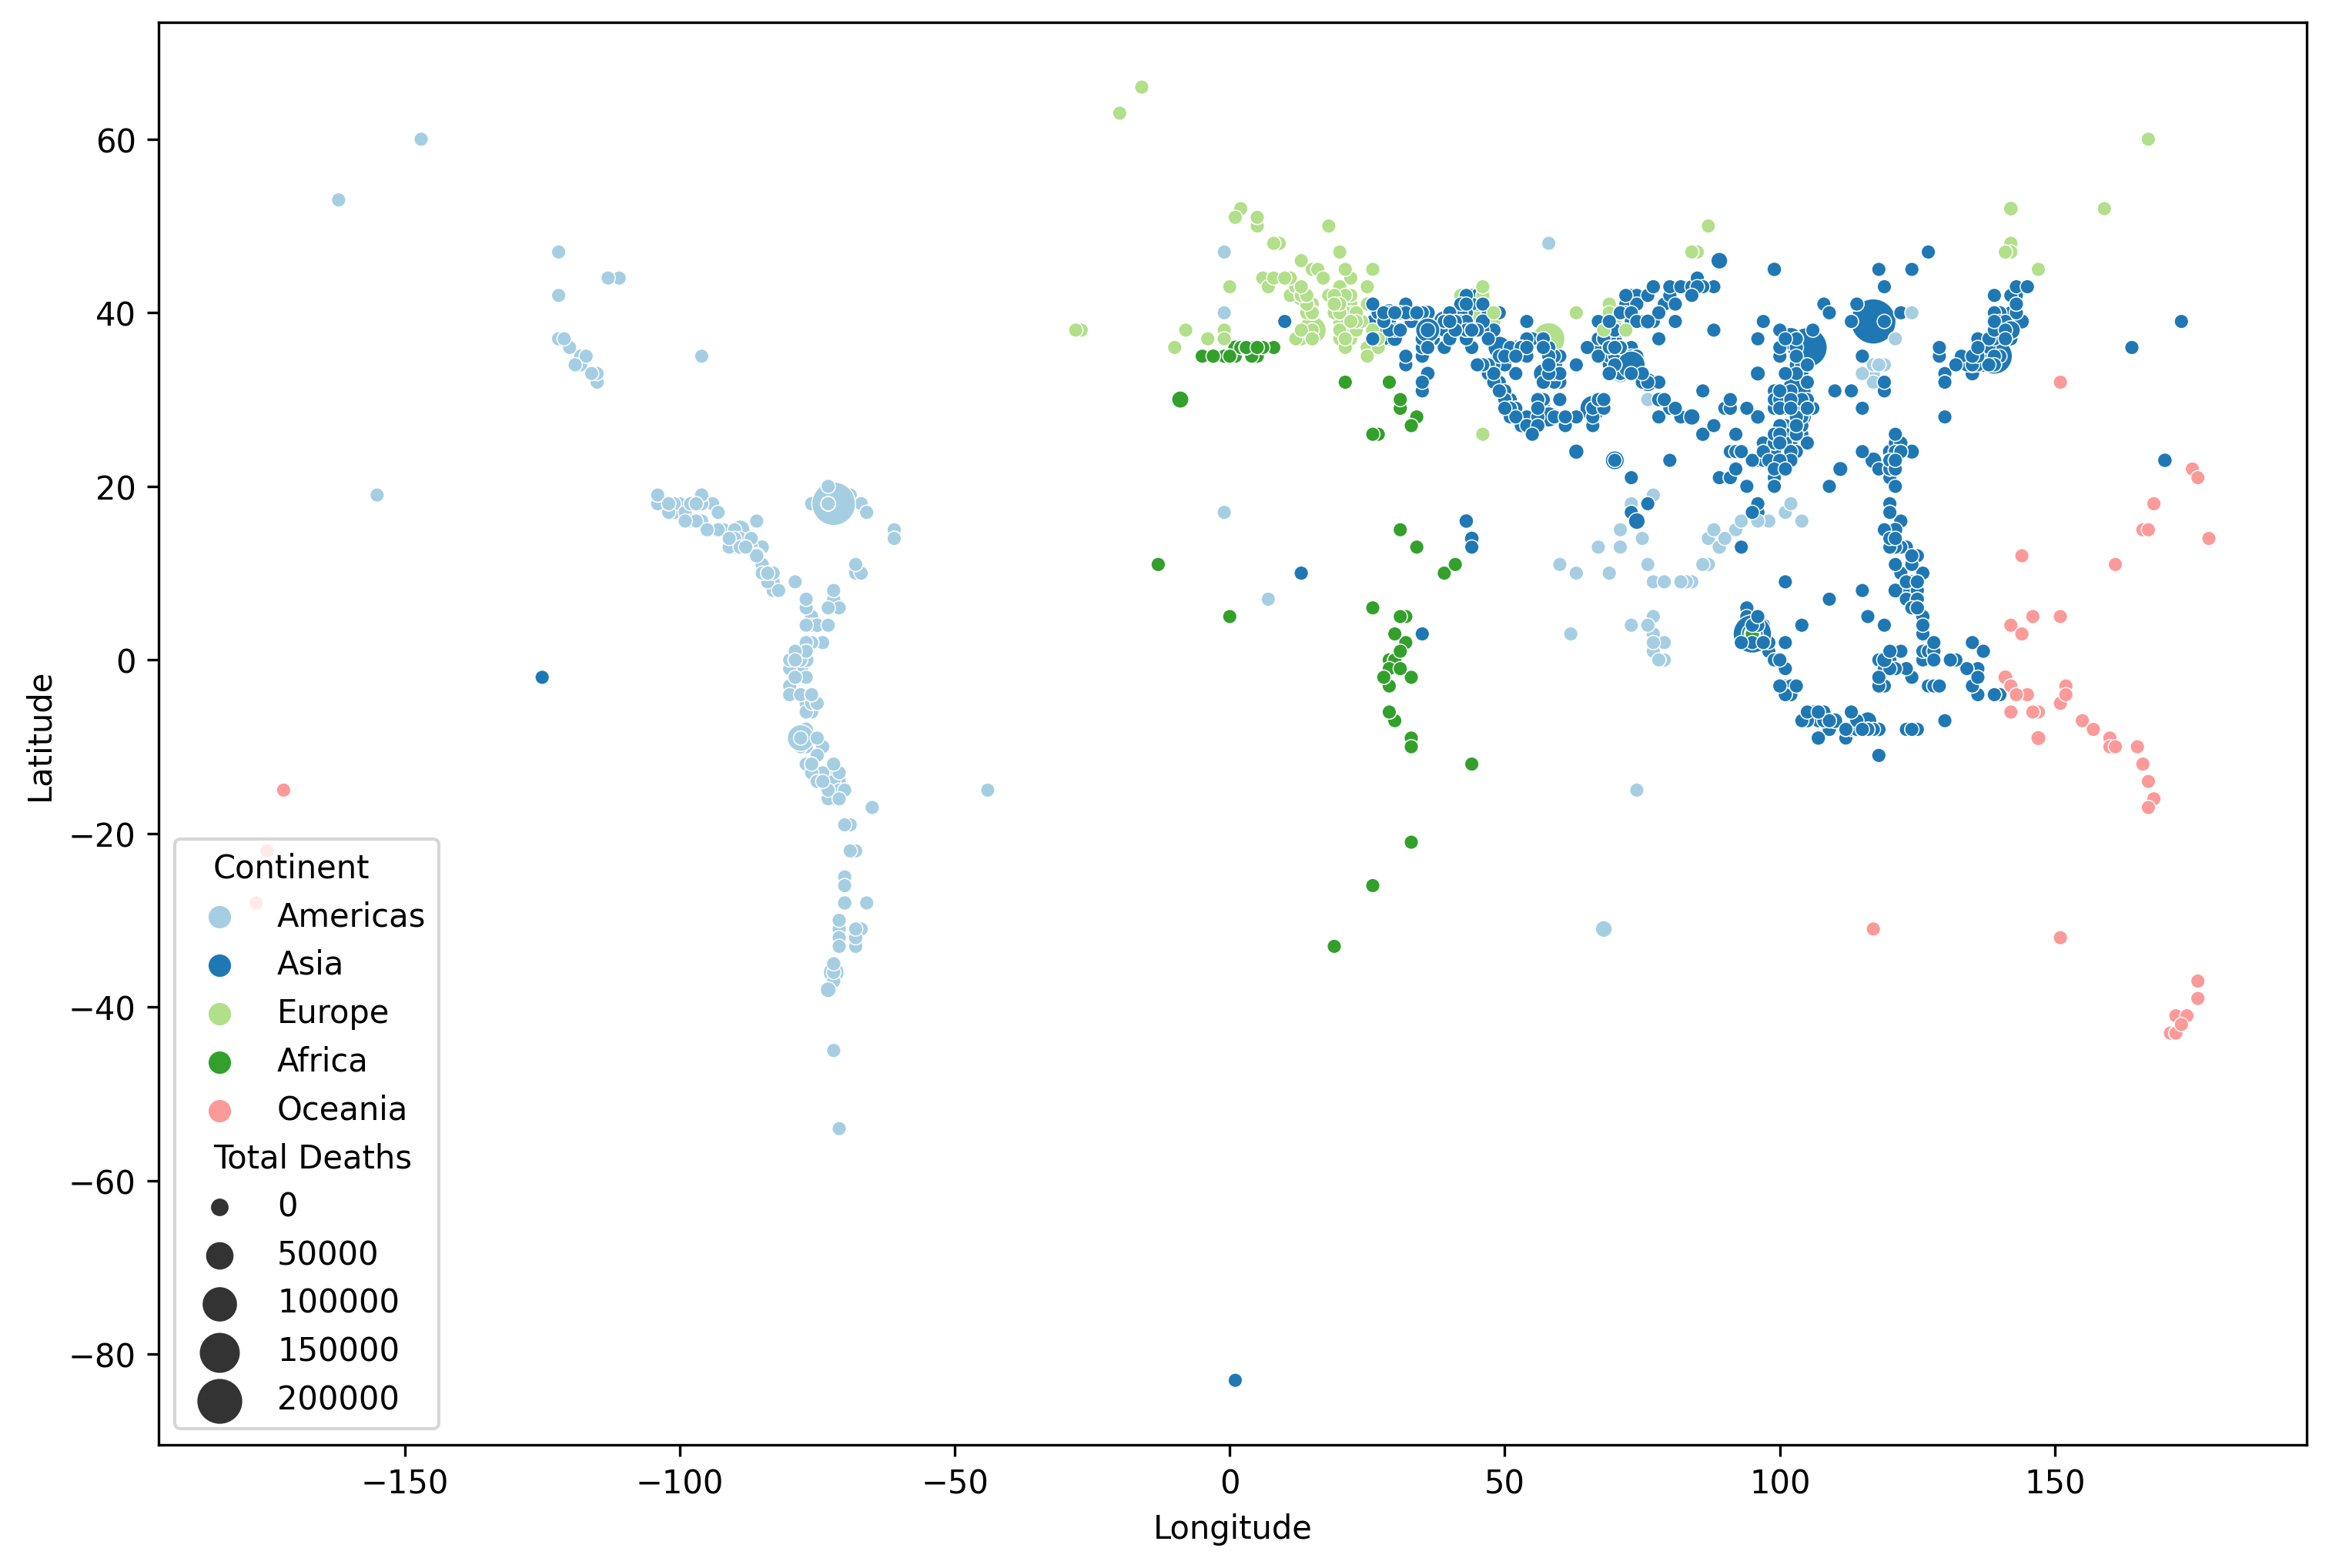

In [28]:
plt.figure(figsize=(12,8), dpi=300)
sns.scatterplot(data=df_earthquake, x='Longitude', y= 'Latitude', hue= 'Continent', palette='Paired', size='Total Deaths', sizes=(20,200))

In [32]:
df_earthquake[['Total Deaths', 'Total Affected', 'Total Damages Adj']].head(50)

,Total Deaths,Total Affected,Total Damages Adj
2,2000,0,843726
9,20000,0,812477
10,20000,0,3249907
11,400,0,0
15,12000,0,0
21,46,0,0
28,1750,0,0
29,12,0,0
37,20,20,0
42,1800,0,0
